In [1]:
from PIL import Image, ImageEnhance
import numpy as np
import imutils
import os
 
# 1 尺寸：8
# 2 旋转 9
# 3 镜像 3
# 4 平移 9
# 5 亮度不变 9
# 6 色度不变 7
# 7 对比度不变 7
# 8 锐度 7
 
#尺寸调整
def ImgResize(Img,ScaleFactor):
    ImgSize = Img.size #获得图像原始尺寸
    NewSize = [int(ImgSize[0]*ScaleFactor),int(ImgSize[1]*ScaleFactor)]  #获得图像新尺寸，保持长宽比
    Img = Img.resize(NewSize)     #利用PIL的函数进行图像resize，类似matlab的imresize函数
    return Img
def ImgResizeTo(Img,NewSize):
    Img = Img.resize(NewSize)     #利用PIL的函数进行图像resize，类似matlab的imresize函数
    return Img
 
#旋转
def ImgRotate(Img,Degree):
    return Img.rotate(Degree) #利用PIL的函数进行图像旋转，类似matlab imrotate函数
#利用PIL的函数进行水平以及上下镜像
def ImgLRMirror(Img):
    return Img.transpose(Image.FLIP_LEFT_RIGHT)
def ImgTBMirror(Img):
    return Img.transpose(Image.FLIP_TOP_BOTTOM)
# 亮度,增强因子为1.0是原始图像
def BrightEnchance(Img, factor):
    enh_bri = ImageEnhance.Brightness(Img)
    image_brightened = enh_bri.enhance(factor)
    return image_brightened
 
# 色度,增强因子为1.0是原始图像
def ColorEnchance(Img, factor):
    enh_col = ImageEnhance.Color(Img)
    image_colored = enh_col.enhance(factor)
    return image_colored
 
#对比度，增强因子为1.0是原始图片
def ContrastEnchance(Img, factor):
    enh_con = ImageEnhance.Contrast(Img)
    image_contrasted = enh_con.enhance(factor)
    return image_contrasted
 
# 锐度，增强因子为1.0是原始图片
def SharpEnchance(Img, factor):
    enh_sha = ImageEnhance.Sharpness(Img)
    image_sharped = enh_sha.enhance(factor)
    return image_sharped
 
# data_path = '/home/xiqi/PycharmProjects/FBMS/Dataset/Trainingset/'
data_path = 'E:/Train picture/'
video_list = os.listdir(data_path)
 
save_path = 'E:/Train picture/augmentation_images/'
if not os.path.exists(save_path):  # 文件夹不存在，则创建
    os.mkdir(save_path)

img_list = os.listdir(data_path)
for j in range(0, len(img_list)):
    print(j)
    img_path = os.path.join(data_path, img_list[j])  # 图片文件
    if os.path.isfile(img_path):
        Img = Image.open(img_path)
        # 1 尺寸
        scale_img1 = ImgResize(Img,0.2)
        scale_img2 = ImgResize(Img,0.4)
        scale_img3 = ImgResize(Img,0.6)
        scale_img4 = ImgResize(Img,0.8)
        scale_img5 = ImgResize(Img,1)
        scale_img6 = ImgResize(Img, 1.2)
        scale_img7 = ImgResize(Img, 1.4)
        scale_img8 = ImgResize(Img, 1.5)
        save_scale_path1 = os.path.join(save_path, 'scale_img1_'+img_list[j])
        save_scale_path2 = os.path.join(save_path, 'scale_img2_'+img_list[j])
        save_scale_path3 = os.path.join(save_path, 'scale_img3_'+img_list[j])
        save_scale_path4 = os.path.join(save_path, 'scale_img4_'+img_list[j])
        save_scale_path5 = os.path.join(save_path, 'scale_img5_'+img_list[j])
        save_scale_path6 = os.path.join(save_path, 'scale_img6_'+img_list[j])
        save_scale_path7 = os.path.join(save_path, 'scale_img7_'+img_list[j])
        save_scale_path8 = os.path.join(save_path, 'scale_img8_'+img_list[j])
        scale_img1.save(save_scale_path1)
        scale_img2.save(save_scale_path2)
        scale_img3.save(save_scale_path3)
        scale_img4.save(save_scale_path4)
        scale_img5.save(save_scale_path5)
        scale_img6.save(save_scale_path6)
        scale_img7.save(save_scale_path7)
        scale_img8.save(save_scale_path8)
 
        # 2 旋转
        rotate_img1 = ImgRotate(Img,10)
        rotate_img2 = ImgRotate(Img,30)
        rotate_img3 = ImgRotate(Img,45)
        rotate_img4 = ImgRotate(Img,90)
        rotate_img5 = Img
        rotate_img6 = ImgRotate(Img, 120)
        rotate_img7 = ImgRotate(Img, 135)
        rotate_img8 = ImgRotate(Img, 170)
        rotate_img9 = ImgRotate(Img, 180)
        save_rotate_path1 = os.path.join(save_path, 'rotate_img1_'+img_list[j])
        save_rotate_path2 = os.path.join(save_path, 'rotate_img2_'+img_list[j])
        save_rotate_path3 = os.path.join(save_path, 'rotate_img3_'+img_list[j])
        save_rotate_path4 = os.path.join(save_path, 'rotate_img4_'+img_list[j])
        save_rotate_path5 = os.path.join(save_path, 'rotate_img5_'+img_list[j])
        save_rotate_path6 = os.path.join(save_path, 'rotate_img6_'+img_list[j])
        save_rotate_path7 = os.path.join(save_path, 'rotate_img7_'+img_list[j])
        save_rotate_path8 = os.path.join(save_path, 'rotate_img8_'+img_list[j])
        save_rotate_path9 = os.path.join(save_path, 'rotate_img9_'+img_list[j])
        rotate_img1.save(save_rotate_path1)
        rotate_img2.save(save_rotate_path2)
        rotate_img3.save(save_rotate_path3)
        rotate_img4.save(save_rotate_path4)
        rotate_img5.save(save_rotate_path5)
        rotate_img6.save(save_rotate_path6)
        rotate_img7.save(save_rotate_path7)
        rotate_img8.save(save_rotate_path8)
        rotate_img9.save(save_rotate_path9)
 
        # 镜像
        mirror_img1 = ImgLRMirror(Img)
        mirror_img2 = ImgTBMirror(Img)
        mirror_img3 = Img
        save_mirror_path1 = os.path.join(save_path, 'mirror_img1_'+img_list[j])
        save_mirror_path2 = os.path.join(save_path, 'mirror_img2_'+img_list[j])
        save_mirror_path3 = os.path.join(save_path, 'mirror_img3_'+img_list[j])
        mirror_img1.save(save_mirror_path1)
        mirror_img2.save(save_mirror_path2)
        mirror_img3.save(save_mirror_path3)
 
        # 平移
        array_img = np.array(Img) # PIL.Image 转 numpy.array
        translation_img1 = imutils.translate(array_img, 60, 60)
        translation_img2 = imutils.translate(array_img, -60, 60)
        translation_img3 = imutils.translate(array_img, 60, -60)
        translation_img4 = imutils.translate(array_img, -60, -60)
        translation_img5 = array_img
        translation_img6 = imutils.translate(array_img, 30, 30)
        translation_img7 = imutils.translate(array_img, -30, 30)
        translation_img8 = imutils.translate(array_img, 30, -30)
        translation_img9 = imutils.translate(array_img, -30, -30)
        save_translation_path1 = os.path.join(save_path, 'translation_img1_'+img_list[j])
        save_translation_path2 = os.path.join(save_path, 'translation_img2_'+img_list[j])
        save_translation_path3 = os.path.join(save_path, 'translation_img3_'+img_list[j])
        save_translation_path4 = os.path.join(save_path, 'translation_img4_'+img_list[j])
        save_translation_path5 = os.path.join(save_path, 'translation_img5_'+img_list[j])
        save_translation_path6 = os.path.join(save_path, 'translation_img6_'+img_list[j])
        save_translation_path7 = os.path.join(save_path, 'translation_img7__'+img_list[j])
        save_translation_path8 = os.path.join(save_path, 'translation_img8_'+img_list[j])
        save_translation_path9 = os.path.join(save_path, 'translation_img9_'+img_list[j])
        translation_img1 = Image.fromarray(translation_img1)
        translation_img2 = Image.fromarray(translation_img2)
        translation_img3 = Image.fromarray(translation_img3)
        translation_img4 = Image.fromarray(translation_img4)
        translation_img5 = Image.fromarray(translation_img5)
        translation_img6 = Image.fromarray(translation_img6)
        translation_img7 = Image.fromarray(translation_img7)
        translation_img8 = Image.fromarray(translation_img8)
        translation_img9 = Image.fromarray(translation_img9)
        translation_img1.save(save_translation_path1)
        translation_img2.save(save_translation_path2)
        translation_img3.save(save_translation_path3)
        translation_img4.save(save_translation_path4)
        translation_img5.save(save_translation_path5)
        translation_img6.save(save_translation_path6)
        translation_img7.save(save_translation_path7)
        translation_img8.save(save_translation_path8)
        translation_img9.save(save_translation_path9)
 
 
        # 以下只对原图操作，亮度,增强因子为0.0将产生黑色图像；为1.0将保持原始图像
        bright_img1 = BrightEnchance(Img, 0.3)
        bright_img2 = BrightEnchance(Img, 0.4)
        bright_img3 = BrightEnchance(Img, 0.5)
        bright_img4 = BrightEnchance(Img, 0.6)
        bright_img5 = BrightEnchance(Img, 0.7)
        bright_img6 = BrightEnchance(Img, 0.8)
        bright_img7 = BrightEnchance(Img, 0.9)
        bright_img8 = BrightEnchance(Img, 0.9)
        bright_img9 = Img
        save_bright_path1 = os.path.join(save_path, 'bright_img1_'+img_list[j])
        save_bright_path2 = os.path.join(save_path, 'bright_img2_'+img_list[j])
        save_bright_path3 = os.path.join(save_path, 'bright_img3_'+img_list[j])
        save_bright_path4 = os.path.join(save_path, 'bright_img4_'+img_list[j])
        save_bright_path5 = os.path.join(save_path, 'bright_img5_'+img_list[j])
        save_bright_path6 = os.path.join(save_path, 'bright_img6_'+img_list[j])
        save_bright_path7 = os.path.join(save_path, 'bright_img7__'+img_list[j])
        save_bright_path8 = os.path.join(save_path, 'bright_img8_'+img_list[j])
        save_bright_path9 = os.path.join(save_path, 'bright_img9_'+img_list[j])
        bright_img1.save(save_bright_path1)
        bright_img2.save(save_bright_path2)
        bright_img3.save(save_bright_path3)
        bright_img4.save(save_bright_path4)
        bright_img5.save(save_bright_path5)
        bright_img6.save(save_bright_path6)
        bright_img7.save(save_bright_path7)
        bright_img8.save(save_bright_path8)
        bright_img9.save(save_bright_path9)
 
        # 色度,增强因子为1.0是原始图像，大于1增强，小于1减弱
        color_img1 = ColorEnchance(Img, 0.5)
        color_img2 = ColorEnchance(Img, 0.7)
        color_img3 = ColorEnchance(Img, 0.9)
        color_img4 = ColorEnchance(Img, 1.1)
        color_img5 = ColorEnchance(Img, 1.3)
        color_img6 = ColorEnchance(Img, 1.5)
        color_img7 = Img
        save_color_path1 = os.path.join(save_path, 'color_img1_'+img_list[j])
        save_color_path2 = os.path.join(save_path, 'color_img2_' + img_list[j])
        save_color_path3 = os.path.join(save_path, 'color_img3_' + img_list[j])
        save_color_path4 = os.path.join(save_path, 'color_img4_' + img_list[j])
        save_color_path5 = os.path.join(save_path, 'color_img5_' + img_list[j])
        save_color_path6 = os.path.join(save_path, 'color_img6_' + img_list[j])
        save_color_path7 = os.path.join(save_path, 'color_img7_' + img_list[j])
        color_img1.save(save_color_path1)
        color_img2.save(save_color_path2)
        color_img3.save(save_color_path3)
        color_img4.save(save_color_path4)
        color_img5.save(save_color_path5)
        color_img6.save(save_color_path6)
        color_img7.save(save_color_path7)
 
 
        #对比度，增强因子为1.0是原始图片,大于1增强，小于1减弱
        contrast_img1 = ContrastEnchance(Img, 0.5)
        contrast_img2 = ContrastEnchance(Img, 0.7)
        contrast_img3 = ContrastEnchance(Img, 0.9)
        contrast_img4 = ContrastEnchance(Img, 1.1)
        contrast_img5 = ContrastEnchance(Img, 1.3)
        contrast_img6 = ContrastEnchance(Img, 1.5)
        contrast_img7 = Img
        save_contrast_path1 = os.path.join(save_path, 'contrast_img1_' + img_list[j])
        save_contrast_path2 = os.path.join(save_path, 'contrast_img2_' + img_list[j])
        save_contrast_path3 = os.path.join(save_path, 'contrast_img3_' + img_list[j])
        save_contrast_path4 = os.path.join(save_path, 'contrast_img4_' + img_list[j])
        save_contrast_path5 = os.path.join(save_path, 'contrast_img5_' + img_list[j])
        save_contrast_path6 = os.path.join(save_path, 'contrast_img6_' + img_list[j])
        save_contrast_path7 = os.path.join(save_path, 'contrast_img7_' + img_list[j])
        contrast_img1.save(save_contrast_path1)
        contrast_img2.save(save_contrast_path2)
        contrast_img3.save(save_contrast_path3)
        contrast_img4.save(save_contrast_path4)
        contrast_img5.save(save_contrast_path5)
        contrast_img6.save(save_contrast_path6)
        contrast_img7.save(save_contrast_path7)
 
        # 锐度，增强因子为1.0是原始图片,大于1增强，小于1减弱
        sharp_img1 = SharpEnchance(Img, 0.5)
        sharp_img2 = SharpEnchance(Img, 0.7)
        sharp_img3 = SharpEnchance(Img, 0.9)
        sharp_img4 = SharpEnchance(Img, 1.1)
        sharp_img5 = SharpEnchance(Img, 1.3)
        sharp_img6 = SharpEnchance(Img, 1.5)
        sharp_img7 = Img
        save_sharp_path1 = os.path.join(save_path, 'sharp_img1_' + img_list[j])
        save_sharp_path2 = os.path.join(save_path, 'sharp_img2_' + img_list[j])
        save_sharp_path3 = os.path.join(save_path, 'sharp_img3_' + img_list[j])
        save_sharp_path4 = os.path.join(save_path, 'sharp_img4_' + img_list[j])
        save_sharp_path5 = os.path.join(save_path, 'sharp_img5_' + img_list[j])
        save_sharp_path6 = os.path.join(save_path, 'sharp_img6_' + img_list[j])
        save_sharp_path7 = os.path.join(save_path, 'sharp_img7_' + img_list[j])
        sharp_img1.save(save_sharp_path1)
        sharp_img2.save(save_sharp_path2)
        sharp_img3.save(save_sharp_path3)
        sharp_img4.save(save_sharp_path4)
        sharp_img5.save(save_sharp_path5)
        sharp_img6.save(save_sharp_path6)
        sharp_img7.save(save_sharp_path7)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41


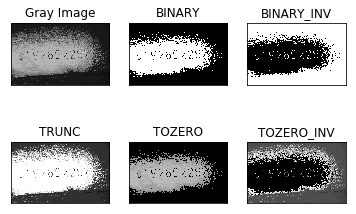

In [15]:

import cv2
import numpy as np
from matplotlib import pyplot as plt
img=cv2.imread('E:/Train picture/Image__2019-07-14__11-29-00.bmp')
GrayImage=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh1=cv2.threshold(GrayImage,127,255,cv2.THRESH_BINARY)
ret,thresh2=cv2.threshold(GrayImage,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3=cv2.threshold(GrayImage,127,255,cv2.THRESH_TRUNC)
ret,thresh4=cv2.threshold(GrayImage,127,255,cv2.THRESH_TOZERO)
ret,thresh5=cv2.threshold(GrayImage,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Gray Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [GrayImage, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [56]:
import numpy as np
import cv2

img = cv2.imread('E:\Train picture\Image__2019-07-07__14-11-30.bmp')
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)#二值化

blurred = np.hstack([cv2.GaussianBlur(gray_img,(3,3),0),#高斯滤波
                     cv2.GaussianBlur(gray_img,(5,5),0),
                     cv2.GaussianBlur(gray_img,(7,7),0)
                     ])

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))#获取自定义核

dilation = cv2.dilate(blurred ,kernel,iterations = 1)#适当的膨胀
canny = cv2.Canny(dilation,30,120)#边缘提取

cv2.imshow("Canny",canny)
cv2.waitKey(0)

-1

In [ ]:
#训练图片库


In [ ]:
#识别
 pylint: disable=C0111,too-many-arguments,too-many-instance-attributes,too-many-locals,redefined-outer-name,fixme
# pylint: disable=superfluous-parens, no-member, invalid-name
import sys
sys.path.insert(0, "../../python")
import mxnet as mx
import numpy as np
import cv2, random
from io import BytesIO
from captcha.image import ImageCaptcha

class OCRBatch(object):
    def __init__(self, data_names, data, label_names, label):
        self.data = data
        self.label = label
        self.data_names = data_names
        self.label_names = label_names

    @property
    def provide_data(self):
        return [(n, x.shape) for n, x in zip(self.data_names, self.data)]

    @property
    def provide_label(self):
        return [(n, x.shape) for n, x in zip(self.label_names, self.label)]

def gen_rand():
    buf = ""
    for i in range(4):
        buf += str(random.randint(0,9))
    return buf

def get_label(buf):
    a = [int(x) for x in buf]
    return np.array(a)

def gen_sample(captcha, width, height):
    num = gen_rand()
    img = captcha.generate(num)
    img = np.fromstring(img.getvalue(), dtype='uint8')
    img = cv2.imdecode(img, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (width, height))
    img = np.multiply(img, 1/255.0)
    img = img.transpose(2, 0, 1)
    return (num, img)

class OCRIter(mx.io.DataIter):
    def __init__(self, count, batch_size, num_label, height, width):
        super(OCRIter, self).__init__()
        self.captcha = ImageCaptcha(fonts=['./data/Xerox.ttf'])

        self.batch_size = batch_size
        self.count = count
        self.height = height
        self.width = width
        self.provide_data = [('data', (batch_size, 3, height, width))]
        self.provide_label = [('softmax_label', (self.batch_size, num_label))]
        
    def __iter__(self):
        for k in range(self.count / self.batch_size):
            data = []
            label = []
            for i in range(self.batch_size):
                num, img = gen_sample(self.captcha, self.width, self.height)
                data.append(img)
                label.append(get_label(num))

            data_all = [mx.nd.array(data)]
            label_all = [mx.nd.array(label)]
            data_names = ['data']
            label_names = ['softmax_label']
            
            data_batch = OCRBatch(data_names, data_all, label_names, label_all)
            yield data_batch

    def reset(self):
        pass

def get_ocrnet():
    data = mx.symbol.Variable('data')
    label = mx.symbol.Variable('softmax_label')
    conv1 = mx.symbol.Convolution(data=data, kernel=(5,5), num_filter=32)
    pool1 = mx.symbol.Pooling(data=conv1, pool_type="max", kernel=(2,2), stride=(1, 1))
    relu1 = mx.symbol.Activation(data=pool1, act_type="relu")

    conv2 = mx.symbol.Convolution(data=relu1, kernel=(5,5), num_filter=32)
    pool2 = mx.symbol.Pooling(data=conv2, pool_type="avg", kernel=(2,2), stride=(1, 1))
    relu2 = mx.symbol.Activation(data=pool2, act_type="relu")

    conv3 = mx.symbol.Convolution(data=relu2, kernel=(3,3), num_filter=32)
    pool3 = mx.symbol.Pooling(data=conv3, pool_type="avg", kernel=(2,2), stride=(1, 1))
    relu3 = mx.symbol.Activation(data=pool3, act_type="relu")

    conv4 = mx.symbol.Convolution(data=relu3, kernel=(3,3), num_filter=32)
    pool4 = mx.symbol.Pooling(data=conv4, pool_type="avg", kernel=(2,2), stride=(1, 1))
    relu4 = mx.symbol.Activation(data=pool4, act_type="relu")
    
    flatten = mx.symbol.Flatten(data = relu4)
    fc1 = mx.symbol.FullyConnected(data = flatten, num_hidden = 256)
    fc21 = mx.symbol.FullyConnected(data = fc1, num_hidden = 10)
    fc22 = mx.symbol.FullyConnected(data = fc1, num_hidden = 10)
    fc23 = mx.symbol.FullyConnected(data = fc1, num_hidden = 10)
    fc24 = mx.symbol.FullyConnected(data = fc1, num_hidden = 10)
    fc2 = mx.symbol.Concat(*[fc21, fc22, fc23, fc24], dim = 0)
    label = mx.symbol.transpose(data = label)
    label = mx.symbol.Reshape(data = label, target_shape = (0, ))
    return mx.symbol.SoftmaxOutput(data = fc2, label = label, name = "softmax")


def Accuracy(label, pred):
    label = label.T.reshape((-1, ))
    hit = 0
    total = 0
    for i in range(pred.shape[0] / 4):
        ok = True
        for j in range(4):
            k = i * 4 + j
            if np.argmax(pred[k]) != int(label[k]):
                ok = False
                break
        if ok:
            hit += 1
        total += 1
    return 1.0 * hit / total

if __name__ == '__main__':
    network = get_ocrnet()
    devs = [mx.gpu(i) for i in range(1)]
    model = mx.model.FeedForward(ctx = devs,
                                 symbol = network,
                                 num_epoch = 1,
                                 learning_rate = 0.001,
                                 wd = 0.00001,
                                 initializer = mx.init.Xavier(factor_type="in", magnitude=2.34),
                                 momentum = 0.9)
    
    batch_size = 8
    data_train = OCRIter(100000, batch_size, 4, 30, 80)
    data_test = OCRIter(1000, batch_size, 4, 30, 80)
    
    import logging
    head = '%(asctime)-15s %(message)s'
    logging.basicConfig(level=logging.DEBUG, format=head)
    
    model.fit(X = data_train, eval_data = data_test, eval_metric = Accuracy, batch_end_callback=mx.callback.Speedometer(batch_size, 50),)
    
    model.save("cnn-ocr")

In [ ]:
# pylint: disable=C0111,too-many-arguments,too-many-instance-attributes,too-many-locals,redefined-outer-name,fixme
# pylint: disable=superfluous-parens, no-member, invalid-name
import sys
sys.path.insert(0, "../../python")
import mxnet as mx
import numpy as np
import cv2, random
from io import BytesIO
from captcha.image import ImageCaptcha
from cnn_ocr import gen_rand, get_label, gen_sample

def get_ocrnet():
    data = mx.symbol.Variable('data')
    conv1 = mx.symbol.Convolution(data=data, kernel=(5,5), num_filter=32)
    pool1 = mx.symbol.Pooling(data=conv1, pool_type="max", kernel=(2,2), stride=(1, 1))
    relu1 = mx.symbol.Activation(data=pool1, act_type="relu")

    conv2 = mx.symbol.Convolution(data=relu1, kernel=(5,5), num_filter=32)
    pool2 = mx.symbol.Pooling(data=conv2, pool_type="avg", kernel=(2,2), stride=(1, 1))
    relu2 = mx.symbol.Activation(data=pool2, act_type="relu")

    conv3 = mx.symbol.Convolution(data=relu2, kernel=(3,3), num_filter=32)
    pool3 = mx.symbol.Pooling(data=conv3, pool_type="avg", kernel=(2,2), stride=(1, 1))
    relu3 = mx.symbol.Activation(data=pool3, act_type="relu")

    conv4 = mx.symbol.Convolution(data=relu3, kernel=(3,3), num_filter=32)
    pool4 = mx.symbol.Pooling(data=conv4, pool_type="avg", kernel=(2,2), stride=(1, 1))
    relu4 = mx.symbol.Activation(data=pool4, act_type="relu")
    
    flatten = mx.symbol.Flatten(data = relu4)
    fc1 = mx.symbol.FullyConnected(data = flatten, num_hidden = 256)
    fc21 = mx.symbol.FullyConnected(data = fc1, num_hidden = 10)
    fc22 = mx.symbol.FullyConnected(data = fc1, num_hidden = 10)
    fc23 = mx.symbol.FullyConnected(data = fc1, num_hidden = 10)
    fc24 = mx.symbol.FullyConnected(data = fc1, num_hidden = 10)
    fc2 = mx.symbol.Concat(*[fc21, fc22, fc23, fc24], dim = 0)
    return mx.symbol.SoftmaxOutput(data = fc2, name = "softmax")

if __name__ == '__main__':
    captcha = ImageCaptcha(fonts=['./data/Xerox.ttf'])
    num, img = gen_sample(captcha, 80, 30)
    print 'gen captcha:', num
    
    batch_size = 1
    _, arg_params, __ = mx.model.load_checkpoint("cnn-ocr", 1)
    data_shape = [("data", (batch_size, 3, 30, 80))]
    input_shapes = dict(data_shape)
    sym = get_ocrnet()
    executor = sym.simple_bind(ctx = mx.cpu(), **input_shapes)
    for key in executor.arg_dict.keys():
        if key in arg_params:
            arg_params[key].copyto(executor.arg_dict[key])

    executor.forward(is_train = True, data = mx.nd.array([img]))
    probs = executor.outputs[0].asnumpy()
    line = ''
    for i in range(probs.shape[0]):
        line += str(np.argmax(probs[i]))
    print 'predicted: ' + line

In [3]:
#cnn 图片增强
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

pic_path = r'E:\Train picture\Image__2019-07-14__11-29-00.bmp'
augmentation_path = r'E:\Train picture\data_augmentation'

data_gen = ImageDataGenerator(
            rotation_range=30,
            width_shift_range=0.1,
            height_shift_range=0.1,
            zoom_range=0.2,
            fill_mode='nearest')

img = load_img(pic_path)
x = img_to_array(img)
x = x.reshape((1,) + x.shape)
n = 1
for batch in data_gen.flow(x, batch_size=1, save_to_dir=augmentation_path, save_prefix='train', save_format='jpeg'):
    n += 1
    if n > 6:
        break
        

Using TensorFlow backend.


In [4]:
#cnn调整尺寸
from PIL import Image
import os

img_path = r'E:\Train picture\data_augmentation'
resize_path = r'E:\Train picture\resize_image'

for i in os.listdir(img_path):
    im = Image.open(os.path.join(img_path,i))
    out = im.resize((224, 224))
    if not os.path.exists(resize_path):
        os.makedirs(resize_path)
    out.save(os.path.join(resize_path, i))

In [6]:
#制作tfrecord格式
import os
from PIL import Image
import tensorflow as tf

# 图片路径，两组标签都在该目录下
cwd = r"E:\Train picture\resize_image"

# tfrecord文件保存路径
file_path = r"E:\Train picture\tfrecord"

# 每个tfrecord存放图片个数
bestnum = 1000

# 第几个图片
num = 0

# 第几个TFRecord文件
recordfilenum = 0

# 将labels放入到classes中
classes = []
for i in os.listdir(cwd):
    classes.append(i)

# tfrecords格式文件名
ftrecordfilename = ("traindata_63.tfrecords-%.3d" % recordfilenum)
writer = tf.python_io.TFRecordWriter(os.path.join(file_path, ftrecordfilename))

for index, name in enumerate(classes):
    class_path = os.path.join(cwd, name)
    for img_name in os.listdir(class_path):
        num = num + 1
        if num > bestnum:    #超过1000，写入下一个tfrecord
            num = 1
            recordfilenum += 1
            ftrecordfilename = ("traindata_63.tfrecords-%.3d" % recordfilenum)
            writer = tf.python_io.TFRecordWriter(os.path.join(file_path, ftrecordfilename))
        
        img_path = os.path.join(class_path, img_name)  # 每一个图片的地址
        img = Image.open(img_path, 'r')
        img_raw = img.tobytes()  # 将图片转化为二进制格式
        example = tf.train.Example(
            features=tf.train.Features(feature={
                'label': tf.train.Feature(int64_list=tf.train.Int64List(value=[index])),
                'img_raw': tf.train.Feature(bytes_list=tf.train.BytesList(value=[img_raw])),
            }))
        writer.write(example.SerializeToString())  # 序列化为字符串
writer.close()

In [7]:
#读取tfrecord文件
import tensorflow as tf


def read_and_decode_tfrecord(filename):
    filename_deque = tf.train.string_input_producer(filename)
    reader = tf.TFRecordReader()
    _, serialized_example = reader.read(filename_deque)
    features = tf.parse_single_example(serialized_example, features={
        'label': tf.FixedLenFeature([], tf.int64),
        'img_raw': tf.FixedLenFeature([], tf.string)})
    label = tf.cast(features['label'], tf.int32)
    img = tf.decode_raw(features['img_raw'], tf.uint8)
    img = tf.reshape(img, [224, 224, 3])
    img = tf.cast(img, tf.float32) / 255.0
    return img, label


train_list = ['E:\Train picture\tfrecord\traindata_63.tfrecords-000']
img, label = read_and_decode_tfrecord(train_list)

In [ ]:
import tensorflow as tf
import tensorflow.contrib.slim.nets as nets

save_dir = r"E:\Train picture\model"  # 模型保存路径
batch_size_ = 2
lr = tf.Variable(0.0001, dtype=tf.uint8)  # 学习速率
x = tf.placeholder(tf.uint8, [None, 224, 224, 3])  # 图片大小为224*224*3
y_ = tf.placeholder(tf.uint8, [None])

train_list = ['traindata_63.tfrecords-000']    #制作成的所有tfrecord数据，每个最多包含1000个图片数据
# 随机打乱顺序
img, label = read_and_decode_tfrecord(train_list)
img_batch, label_batch = tf.train.shuffle_batch([img, label], num_threads=2, batch_size=batch_size_, capacity=10000,
                                                min_after_dequeue=9900)
img_batch, label_batch = tf.train.batch([img, label], num_threads=2, batch_size=2, capacity=1000)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # 创建一个协调器，管理线程
    coord = tf.train.Coordinator()
    # 启动QueueRunner,此时文件名队列已经进队
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)
    while True:
        b_image, b_label = sess.run([img_batch, label_batch])
        b_image = Image.fromarray(b_image[0])
        plt.imshow(b_image)
        plt.axis('off')
        plt.show()
    coord.request_stop()
    # 其他所有线程关闭之后，这一函数才能返回
    coord.join(threads)

W0718 14:54:22.915917  4308 deprecation.py:323] From <ipython-input-7-18fbd536cffe>:14: shuffle_batch (from tensorflow.python.training.input) is deprecated and will be removed in a future version.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.shuffle(min_after_dequeue).batch(batch_size)`.
W0718 14:54:22.918917  4308 deprecation.py:323] From <ipython-input-7-18fbd536cffe>:15: batch (from tensorflow.python.training.input) is deprecated and will be removed in a future version.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.batch(batch_size)` (or `padded_batch(...)` if `dynamic_pad=True`).
W0718 14:54:22.968517  4308 deprecation.py:323] From <ipython-input-7-18fbd536cffe>:22: start_queue_runners (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `t